In [30]:
import datetime

from numpy import array
import pandas
import matplotlib.pyplot as plt

import data_pers
import useful
import read_contacts
from read_data import DATA_DATES, POP_SIZE, MODEL_n, MODEL_T
from read_data import WARD, ICUC
from parameters import Parameters
import model
from MCMC import TRIAL_N


def to_natural(H, T=MODEL_T):
    par = Parameters(T)
    return pandas.DataFrame([par.update(row.to_dict()).convert_all() for _, row in H.iterrows()])


def get_prognosis(H, subsample=100, T=MODEL_T):
    subsample = H[::max(1, len(H)//subsample)]
    par = Parameters(T)
    
    # create needed number of models and parameter sets
    parameters = [par.update(row.to_dict()).for_simulations() for _, row in subsample.iterrows()]
    simulations = [model.Epidemic(T) for i in range(len(parameters))]
    
    # simulate
    for par, ep in zip(parameters, simulations):
        ep.sample_extra(**par)

    return simulations


In [31]:
# Load warmup iterations
H = data_pers.Load(TRIAL_N, files=[0])

print( len(H) )
print( H['Posterior'].min(), H['Posterior'].max() )

500
-1250.6156758 -874.762323328


In [25]:
# Load main iterations
H = data_pers.Load(TRIAL_N, files=[1])
H = to_natural(H)
print( len(H) )
print( H['Posterior'].min(), H['Posterior'].max() )

4656
-904.921874342 -873.415423955


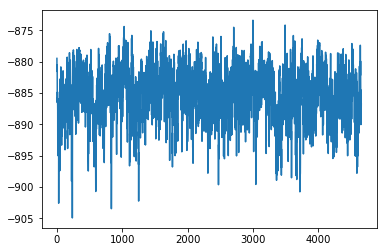

In [26]:
# show traceplots
plt.plot(H['Posterior'])
plt.show()

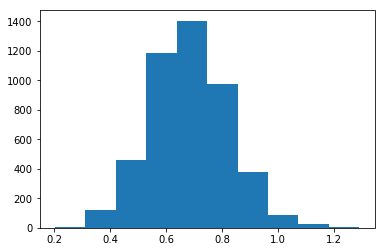

In [27]:
# show histogram
plt.hist(H['log_Ro_1'])
plt.show()

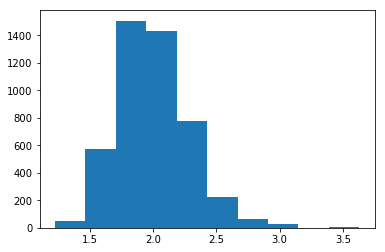

In [28]:
# show histogram in absolute scale
plt.hist(H['Ro_1'])
plt.show()

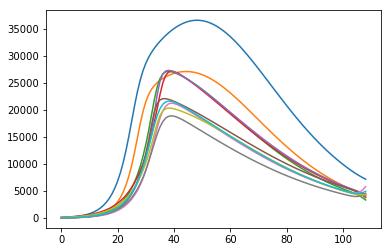

In [34]:
# show samples from posterior
P = get_prognosis(H, subsample=10)

for ep in P:
    plt.plot(ep.I.sum(0))
plt.show()

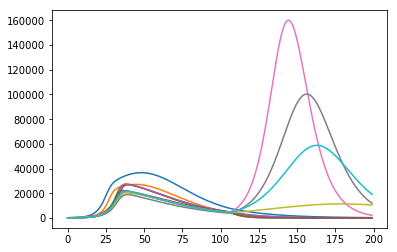

In [35]:
# show samples from prognosis
P = get_prognosis(H, subsample=10, T=200)

for ep in P:
    plt.plot(ep.I.sum(0))
plt.show()

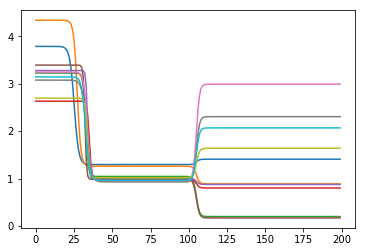

In [38]:
# plot Ro
for ep in P:
    plt.plot(ep._par_used['Ro_t'])
plt.show()